In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('netflix_titles.csv')

# Ask the 7 questions

# 1. How big is the data?

In [ ]:
df.shape
# so here we have 8807 rows and 12 columns, in other words a 2D tensor of shape: (8807, 12)

# 2. How does the data look like?

In [ ]:
df.head(10)

In [ ]:
df.sample(10)

# 3. What is the data type of cols?

In [ ]:
df.info()

# 4. Are there any missing values?

In [ ]:
df.isnull().sum()

# 5. How does the data look mathematically?

In [ ]:
df.describe()

# 6. Are there duplicate values?

In [ ]:
int(df.duplicated().sum())

# 7. How is the correlation between cols?

In [ ]:
df.select_dtypes(include='number').corr()['release_year']
# There is no correlation between any two columns and hence, this doesn't make any sense

# Univariate Analysis

#### Now to make analysis simpler, let's convert the date_added to year_added

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
def format(date):
    if date:
        parts = date.split()
        return int(''.join(parts[-1]))
    return 2015

In [8]:
df = pd.read_csv('netflix_titles.csv', converters = {'date_added': format})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8807 non-null   int64 
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(2), object(10)
memory usage: 825.8+ KB


In [10]:
df.rename(columns={'date_added': 'year_added'}, inplace=True)


In [11]:
df['year_added'] = df['year_added'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   year_added    8807 non-null   int64 
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(2), object(10)
memory usage: 825.8+ KB


### Now let's do the Univariate analysis column by column

# Column1: show_id is simply a serial number, so no need to analyse

# Column2: Type: Movie or Show is CATEGORICAL
## Let's do categorical Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


<Axes: xlabel='type', ylabel='count'>

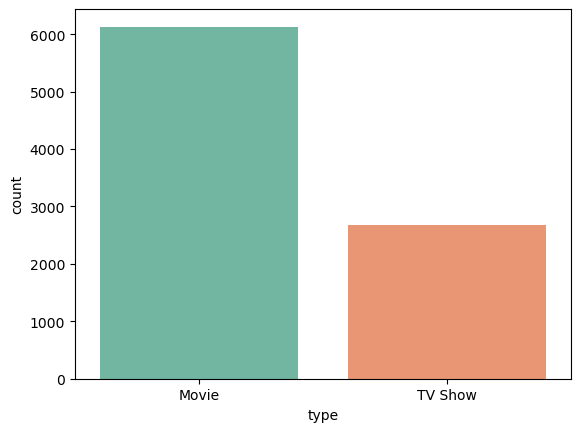

In [14]:
#df['type'].value_counts().plot(kind='bar')
print(df['type'].value_counts())
sns.countplot(x='type', hue='type',data=df, palette='Set2')

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct='%.2f')

`So there are 6131 Movies and 2676 TV Shows`   
`i.e, 69.62% of Movies and 30.38% of TV Shows`

# Column3: Title: Neither Categorical nor Numerical
## So ignore this

# Column4: Director: can be considered as categorical. 
## Let's do Categorical Analysis

`But the categories made are too many and hence the analysis becomes not valuable`

# Column 5: Cast: neither categorical nor numerical as a whole
`So ignoring this column`

# Column 6: Country: Clearly Categorical.
`But it's 748 countries and is too much categorization, hence ignoring`

# Column 7: year_added: Numerical   
`Let's do the numerical analysis`

In [15]:
# Histogram:
import matplotlib.pyplot as plt

(array([4.000e+00, 1.000e+00, 1.300e+01, 1.400e+01, 2.400e+01, 9.200e+01,
        1.617e+03, 1.649e+03, 2.016e+03, 3.377e+03]),
 array([2008. , 2009.3, 2010.6, 2011.9, 2013.2, 2014.5, 2015.8, 2017.1,
        2018.4, 2019.7, 2021. ]),
 <BarContainer object of 10 artists>)

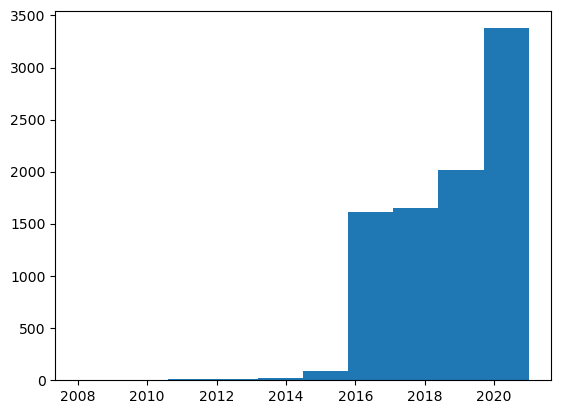

In [16]:
plt.hist(df['year_added'])

(array([4.000e+00, 1.000e+00, 1.300e+01, 1.400e+01, 2.400e+01, 9.200e+01,
        1.617e+03, 1.649e+03, 2.016e+03, 3.377e+03]),
 array([2008. , 2009.3, 2010.6, 2011.9, 2013.2, 2014.5, 2015.8, 2017.1,
        2018.4, 2019.7, 2021. ]),
 <BarContainer object of 10 artists>)

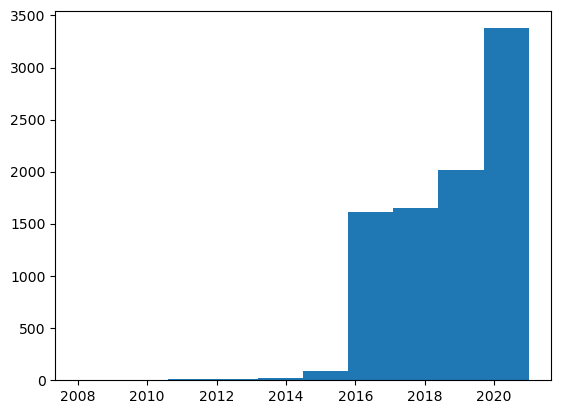

In [17]:
plt.hist(df['year_added'], bins=10)

In [ ]:
# distplot
sns.displot(df['year_added'], kde=True)

In [ ]:
sns.boxplot(x=df['year_added'])

In [ ]:
df['year_added'].min()

In [ ]:
df['year_added'].max()

In [ ]:
df['year_added'].mean()

In [ ]:
df['year_added'].skew()